<a href="https://colab.research.google.com/github/rahiakela/audio-processing-research-and-practice/blob/main/huggingface-audio-course/unit-02-audio-application/hands_on_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

**Reference**:

[Hands-on exercise](https://huggingface.co/learn/audio-course/chapter2/hands_on)

In [ ]:
!pip install transformers
!pip install datasets[audio]

In [23]:
from datasets import load_dataset
from datasets import Audio

from transformers import WhisperFeatureExtractor
from transformers import AutoProcessor

from transformers import pipeline

import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio

##Dataset

In [13]:
voxpopuli_croatian = load_dataset("facebook/voxpopuli", name="en_accented", streaming=True)
voxpopuli_croatian

{'test': <datasets.iterable_dataset.IterableDataset at 0x7b143a840c40>}

In [4]:
next(iter(voxpopuli_croatian["test"]))

{'audio_id': '20111116-0900-PLENARY-8-en_20111116-16:02:33_0',
 'language': 16,
 'audio': {'path': 'test_part_0/20111116-0900-PLENARY-8-en_20111116-16:02:33_0.wav',
  'array': array([-0.01571655, -0.00256348,  0.00823975, ..., -0.00466919,
         -0.00466919, -0.00241089]),
  'sampling_rate': 16000},
 'raw_text': 'President are the relations of the European union with the United States of America among the most important stabilizing factors that',
 'normalized_text': 'president are the relations of the european union with the united states of america among the most important stabilizing factors that',
 'gender': 'na',
 'speaker_id': '33997',
 'is_gold_transcript': True,
 'accent': 'en_ro'}

In [5]:
voxpopuli_croatian_head = voxpopuli_croatian["test"].take(3)
list(voxpopuli_croatian_head)

[{'audio_id': '20111116-0900-PLENARY-8-en_20111116-16:02:33_0',
  'language': 16,
  'audio': {'path': 'test_part_0/20111116-0900-PLENARY-8-en_20111116-16:02:33_0.wav',
   'array': array([-0.01571655, -0.00256348,  0.00823975, ..., -0.00466919,
          -0.00466919, -0.00241089]),
   'sampling_rate': 16000},
  'raw_text': 'President are the relations of the European union with the United States of America among the most important stabilizing factors that',
  'normalized_text': 'president are the relations of the european union with the united states of america among the most important stabilizing factors that',
  'gender': 'na',
  'speaker_id': '33997',
  'is_gold_transcript': True,
  'accent': 'en_ro'},
 {'audio_id': '20140204-0900-PLENARY-13-en_20140204-16:05:43_1',
  'language': 16,
  'audio': {'path': 'test_part_0/20140204-0900-PLENARY-13-en_20140204-16:05:43_1.wav',
   'array': array([-0.10546875, -0.10955811, -0.11694336, ...,  0.21987915,
           0.21127319,  0.18862915]),
  

In [20]:
example = next(iter(voxpopuli_croatian["test"]))
example

{'audio_id': '20111116-0900-PLENARY-8-en_20111116-16:02:33_0',
 'language': 16,
 'audio': {'path': 'test_part_0/20111116-0900-PLENARY-8-en_20111116-16:02:33_0.wav',
  'array': array([-0.01571655, -0.00256348,  0.00823975, ..., -0.00466919,
         -0.00466919, -0.00241089]),
  'sampling_rate': 16000},
 'raw_text': 'President are the relations of the European union with the United States of America among the most important stabilizing factors that',
 'normalized_text': 'president are the relations of the european union with the united states of america among the most important stabilizing factors that',
 'gender': 'na',
 'speaker_id': '33997',
 'is_gold_transcript': True,
 'accent': 'en_ro'}

In [24]:
# Listen to the example's audio
Audio(example["audio"]["array"], rate=16000)

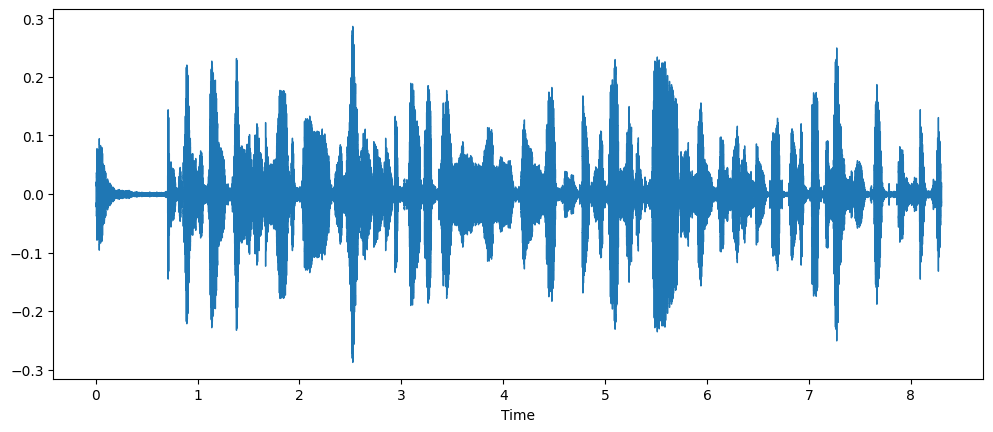

In [7]:
# Let’s plot the waveform for the first example
array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

In [ ]:
# Let’s load the feature extractor from the pre-trained Whisper checkpoint
feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")

In [9]:
def prepare_dataset(example):
  audio = example["audio"]
  features = feature_extractor(audio["array"], sampling_rate=audio["sampling_rate"], padding=True)
  return features

In [10]:
# let's apply the data preparation function to all of our training examples
voxpopuli_croatians = voxpopuli_croatian_head.map(prepare_dataset)
voxpopuli_croatians

In [11]:
example = list(voxpopuli_croatians)[0]
example

{'audio_id': '20111116-0900-PLENARY-8-en_20111116-16:02:33_0',
 'language': 16,
 'audio': {'path': 'test_part_0/20111116-0900-PLENARY-8-en_20111116-16:02:33_0.wav',
  'array': array([-0.01571655, -0.00256348,  0.00823975, ..., -0.00466919,
         -0.00466919, -0.00241089]),
  'sampling_rate': 16000},
 'raw_text': 'President are the relations of the European union with the United States of America among the most important stabilizing factors that',
 'normalized_text': 'president are the relations of the european union with the united states of america among the most important stabilizing factors that',
 'gender': 'na',
 'speaker_id': '33997',
 'is_gold_transcript': True,
 'accent': 'en_ro',
 'input_features': [array([[ 0.37759316, -0.03012609,  0.137268  , ...,  0.18260759,
           0.07251835, -0.18336368],
         [ 0.3776468 ,  0.00501055,  0.24497038, ...,  0.1710478 ,
           0.22330052,  0.10107034],
         [ 0.4052118 ,  0.1984868 ,  0.30305576, ...,  0.45379406,
      

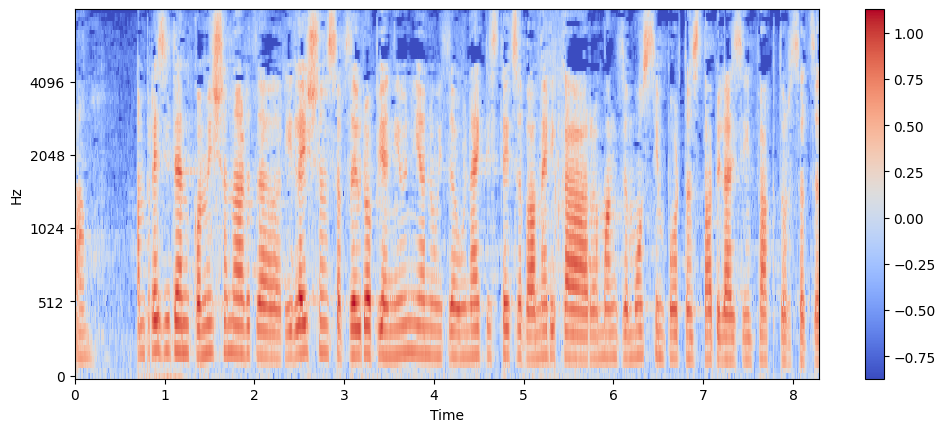

In [12]:
# let’s visualize it for one of the examples in the minds dataset
input_features = example["input_features"]

plt.figure().set_figwidth(12)
librosa.display.specshow(
    np.asarray(input_features[0]),
    x_axis="time",
    y_axis="mel",
    sr=feature_extractor.sampling_rate,
    hop_length=feature_extractor.hop_length
)
plt.colorbar()

##ASR

In [ ]:
asr = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-large-xlsr-53-german")

In [26]:
# Next, we’ll take an example from the dataset and pass its raw data to the pipeline
asr(example["audio"]["array"])

{'text': 'am präsident commionarde rlns  ropi ni ntsovmeia'}

In [27]:
# Let’s compare this output to what the actual transcription
example["raw_text"]

'President are the relations of the European union with the United States of America among the most important stabilizing factors that'

In [28]:
# Once again, listen to compare. Even though the output doesn't match exactly the provided transcription, the model actually does really well.
# You don't really hear the "Denn es gibt bio" part in the Audio.
Audio(example["audio"]["array"], rate=16000)